In [1]:
import numpy as np
from PIL import Image
import os
from scipy import signal

# read lena.bmp
sample_img = Image.open('lena.bmp')
sample_arr = np.array(sample_img).astype(int)

# build output directory
if not os.path.exists('results'):
    os.mkdir('results')

In [24]:
# define function
def binarize(img, thr, Islower=True):
    img_bin = np.zeros(img.shape)
    if Islower:
        img_bin[img < thr] = 255
    else:
        img_bin[img >= thr] = 255
    return img_bin

def laplace_mask1(img):
    k = np.array([
            [0, 1, 0],
            [1, -4, 1],
            [0, 1, 0]
    ])
    return signal.convolve2d(img, k)

def laplace_mask2(img):
    k = np.array([
            [1., 1, 1],
            [1, -8, 1],
            [1, 1, 1]
    ]) / 3
    return signal.convolve2d(img, k)
    
def minimum_variance_laplacian(img):
    k = np.array([
            [2., -1, 2],
            [-1, -4, -1],
            [2, -1, 2]
    ]) / 3
    return signal.convolve2d(img, k)

def laplace_of_gaussian(img):
    k = np.array([
            [0, 0, 0, -1, -1, -2, -1, -1, 0, 0, 0],
            [0, 0, -2, -4, -8, -9, -8, -4, -2, 0, 0],
            [0, -2, -7, -15, -22, -23, -22, -15, -7, -2, 0],
            [-1, -4, -15, -24, -14, -1, -14, -24, -15, -4, -1],
            [-1, -8, -22, -14, 52, 103, 52, -14, -22, -8, -1],
            [-2, -9, -23, -1, 103, 178, 103, -1, -23, -9, -2],
            [-1, -8, -22, -14, 52, 103, 52, -14, -22, -8, -1],
            [-1, -4, -15, -24, -14, -1, -14, -24, -15, -4, -1],
            [0, -2, -7, -15, -22, -23, -22, -15, -7, -2, 0],
            [0, 0, -2, -4, -8, -9, -8, -4, -2, 0, 0],
            [0, 0, 0, -1, -1, -2, -1, -1, 0, 0, 0]
    ])
    return signal.convolve2d(img, k)

def difference_of_gaussian(img):
    k = np.array([
            [-1, -3, -4, -6, -7, -8, -7, -6, -4, -3, -1],
            [-3, -5, -8, -11, -13, -13, -13, -11, -8, -5, -3],
            [-4, -8, -12, -16, -17, -17, -17, -16, -12, -8, -4],
            [-6, -11, -16, -16, 0, 15, 0, -16, -16, -11, -6],
            [-7, -13, -17, 0, 85, 160, 85, 0, -17, -13, -7],
            [-8, -13, -17, 15, 160, 283, 160, 15, -17, -13, -8],
            [-7, -13, -17, 0, 85, 160, 85, 0, -17, -13, -7],
            [-6, -11, -16, -16, 0, 15, 0, -16, -16, -11, -6],
            [-4, -8, -12, -16, -17, -17, -17, -16, -12, -8, -4],
            [-3, -5, -8, -11, -13, -13, -13, -11, -8, -5, -3],
            [-1, -3, -4, -6, -7, -8, -7, -6, -4, -3, -1],
    ])
    return signal.convolve2d(img, k)

In [25]:
PIL_image = Image.fromarray(binarize(laplace_mask1(sample_arr), 15).astype('uint8'))
PIL_image.save('results/LaplaceMask1.bmp')

In [26]:
PIL_image = Image.fromarray(binarize(laplace_mask2(sample_arr), 15).astype('uint8'))
PIL_image.save('results/LaplaceMask2.bmp')

In [27]:
PIL_image = Image.fromarray(binarize(minimum_variance_laplacian(sample_arr), 20).astype('uint8'))
PIL_image.save('results/MinimumVarianceLaplacian.bmp')

In [28]:
PIL_image = Image.fromarray(binarize(laplace_of_gaussian(sample_arr), 3000).astype('uint8'))
PIL_image.save('results/LaplaceOfGaussian.bmp')

In [29]:
PIL_image = Image.fromarray(binarize(difference_of_gaussian(sample_arr), 1, False).astype('uint8'))
PIL_image.save('results/DifferenceOfGaussian.bmp')

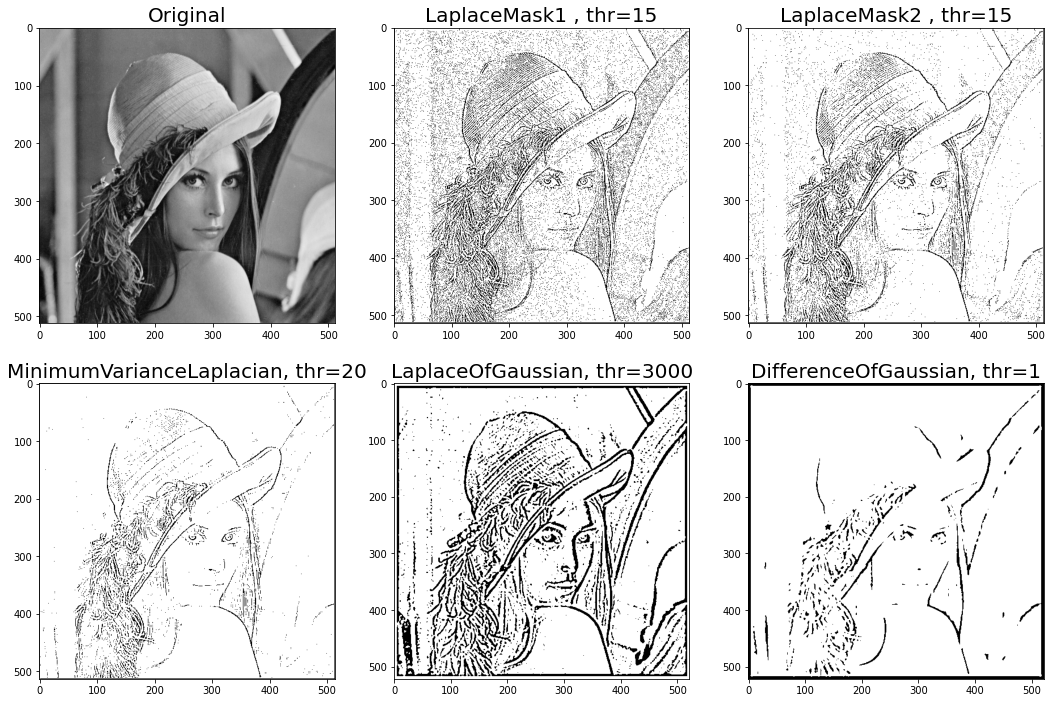

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize=(18, 12))

ax[0, 0].imshow(sample_arr, cmap = 'gray')
ax[0, 0].set_title('Original', fontsize=20)

ax[0, 1].imshow(binarize(laplace_mask1(sample_arr), 15), cmap = 'gray')
ax[0, 1].set_title('LaplaceMask1 , thr=15', fontsize=20)

ax[0, 2].imshow(binarize(laplace_mask2(sample_arr), 15), cmap = 'gray')
ax[0, 2].set_title('LaplaceMask2 , thr=15', fontsize=20)

ax[1, 0].imshow(binarize(minimum_variance_laplacian(sample_arr), 20), cmap = 'gray')
ax[1, 0].set_title('MinimumVarianceLaplacian, thr=20', fontsize=20)
           
ax[1, 1].imshow(binarize(laplace_of_gaussian(sample_arr), 3000), cmap = 'gray')
ax[1, 1].set_title('LaplaceOfGaussian, thr=3000', fontsize=20)
               
ax[1, 2].imshow(binarize(difference_of_gaussian(sample_arr), 1, False), cmap = 'gray')
ax[1, 2].set_title('DifferenceOfGaussian, thr=1', fontsize=20)

plt.show()